In [1]:
import pandas as pd

In [2]:
import os
os.chdir(r'F:\D\Edureka\Edureka - 24 June - Python\Class 14')

In [3]:
import numpy as np

In [4]:
dataset = pd.read_csv('Mall_Customers.csv')

In [5]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
x = dataset.iloc[:,3:5].values

In [7]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [11]:
import matplotlib.pyplot as plt

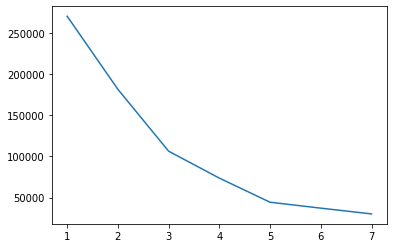

In [21]:
plt.plot(range(1,8), wcss)

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++')
y_kmeans = kmeans.fit_predict(x)

In [23]:
y_kmeans

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [25]:
pd.concat([dataset, pd.DataFrame(y_kmeans)], axis=1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


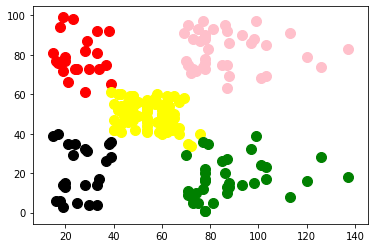

In [27]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='yellow')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='pink')
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4, 1], s=100, c='black')

In [28]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x,y_kmeans))

0.553931997444648


In [29]:
import scipy.cluster.hierarchy as sch

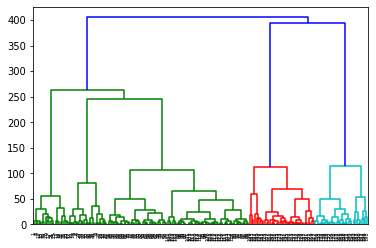

In [30]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

In [31]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

In [32]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [34]:
pd.concat([dataset, pd.DataFrame(y_hc)], axis=1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


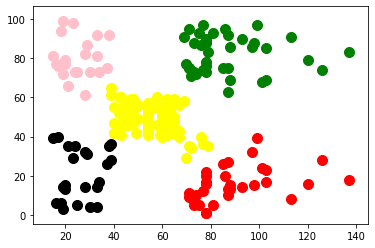

In [35]:
plt.scatter(x[y_hc==0, 0], x[y_hc==0, 1], s=100, c='red')
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 1], s=100, c='yellow')
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 1], s=100, c='green')
plt.scatter(x[y_hc==3, 0], x[y_hc==3, 1], s=100, c='pink')
plt.scatter(x[y_hc==4, 0], x[y_hc==4, 1], s=100, c='black')

In [36]:
print(silhouette_score(x,y_hc))

0.5529945955148897
